In [2]:
#importing
from pylab import *

import urllib2

import matplotlib.tri as Tri
import datetime
import time
import sys
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [3]:
#getting the url for the files
def getURL (ensemble):
    url_base='http://opendap.renci.org:1935/thredds/fileServer/Experiments/Isabel_ex1/tracks/Isabel_ex1_12km_n%02d.trk'
    url=url_base % ensemble
    return url

#Getting the files
def getFile (url):
    response = urllib2.urlopen(url)
    return response

#reading out the info
def getInfo (files):
    film = np.zeros((721,10))
    x=0
    for line in files:
        if line.startswith('#'):
            continue
        lists = line.split()
        arrays = np.asarray(lists, dtype = np.float)
        film[x,:] = arrays
        x=x+1
    return film

In [4]:
totalens = 20
size = (5,721,totalens)
multi = np.zeros(size)
ens = 1

for ens in range(1,21):
    url = getURL(ens)
    files = getFile(url)
    info = getInfo(files)
    multi[0,:,ens-1] = info[:,5] #lon
    multi[1,:,ens-1] = info[:,6] #lat
    multi[2,:,ens-1] = info[:,7] #Pmin(mb)
    multi[3,:,ens-1] = info[:,8] #Rmax (km)
    multi[4,:,ens-1] = info[:,9] #Vmax (m/s)

C:\Users\jsmith22\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\axes\_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
C:\Users\jsmith22\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\axes\_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


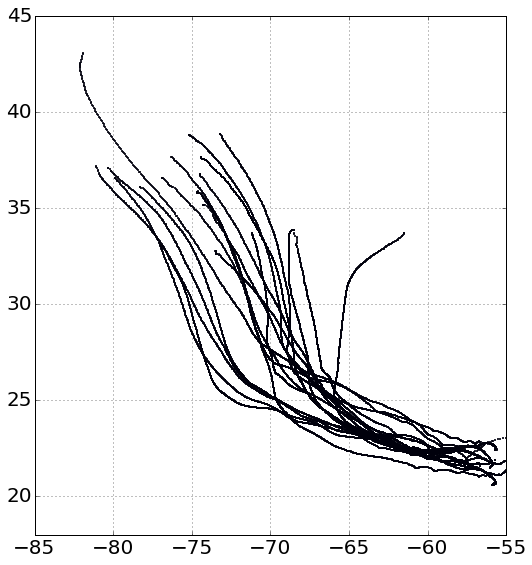

In [5]:
fig = plt.figure(figsize=(18,9), dpi=144)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
ax.set_aspect(1.0/np.cos(35 * np.pi / 180.0))

plt.grid(True)
plt.xlim((-85,-55))
plt.ylim((18,45))
plt.tick_params(axis='both', which='major', labelsize=20)
for ens in range (0,totalens):
    plt.scatter(multi[0,:,ens],multi[1,:,ens], s=1)

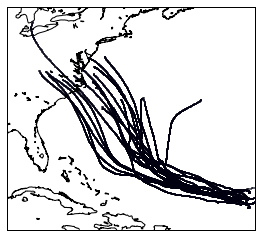

In [16]:
llcrnrlon=-85  # lower-left corner, lon
llcrnrlat=18 # lower-left corner, lat
urcrnrlon=-55  # upper-right corner, lon
urcrnrlat=45   # upper-right corner, lat

m = Basemap(llcrnrlon=-85,
            llcrnrlat=18,
            urcrnrlon=-55,
            urcrnrlat=45, resolution = 'i')

m.drawcoastlines(linewidth=1.)

for ens in range (0,totalens):
    lon = multi[0,:,ens]
    lat = multi[1,:,ens]
    mlon,mlat = m(lon,lat)
    m.scatter(mlon,mlat, s=0.5)
    